# Assignment 1 - APIs

<div class="alert alert-block alert-info">
<p>I've set this up as a partially autograded assignment.</p>
 
<p>The points grading is mainly for you to see where you are going right and going wrong, and to tell me where to take a closer look. You won't be penalized just because your output doesn't match what the autograder expects.</p>
    
<p>In practice, I'll grade holistically rather than a question-by-question basis, using a check, check- and check+ scale.</p>
</div>

Please help me grade by observing the following:
 
* Do not rename this notebook (that messes up the autograder)
* Do not include large sections of output (that makes it hard to find your code). For example, use `df.head()` to show the first few rows, rather than printing an entire dataframe. The same goes for printing long strings.

### Policy on ChatGPT and similar LLMs

ChatGPT and similar tools can be useful in trying to figure out the syntax for a complex command, or to understand and fix an error. However, if you jump directly to ChatGPT for an answer, that means you aren't learning anything. 

Therefore, you may you use ChatGPT or a similar tool for this homework if you:
- clearly acknowledge when and how you used the tool (e.g., "I got a syntax error when trying to join the two dataframes, and asked ChatGPT for help")
- attempt the question on your own first, and try to fix any errors. Include your original attempts in your submission (you can comment out the lines that don't work)
- briefly discuss what you learned from ChatGPT (e.g., "I learned that function definitions need a colon (:) after the def statement."). Don't just uncritically accept ChatGPT's answer - learn from it!

If you have any questions, talk to the instructor before you submit.

### Start of homework assignment
What is your name (it's not always easy to match your GitHub account name to you.)

Name: Meaghan Woody

We saw the [BART API](http://api.bart.gov/docs/overview/index.aspx) in class. 

The first question asks you to extract some station information from the API.

Create a pandas dataframe (call it `stationdf`) of all stations, including their name, lat/lon, and the other information that is returned from the station information API.



In [21]:
# Call the BART API using the same code from Lecture 1a but for all stations
import requests
import json

APIkey = 'QX8B-PPE7-9RAT-DWEI' 
requestString = 'https://api.bart.gov/api/stn.aspx?cmd=stns&key=' + APIkey + '&json=y'

r = requests.get(requestString)

# help(r)
print(r.ok) # True - response was returned 

True


In [22]:
d = json.loads(r.text) #json to dictionary
print(type(d))

print(d['root'].keys()) # dictionary 

# inspect 'stations' dict further
print(type(d['root']['stations'])) # dictionary
print(d['root']['stations'].keys())
print(d['root']['stations'].keys()) 

# inspect 'station' dict further

print(type(d['root']['stations']['station'])) # list

<class 'dict'>
dict_keys(['uri', 'stations', 'message'])
<class 'dict'>
dict_keys(['station'])
dict_keys(['station'])
<class 'list'>


In [23]:
# Pandas dataframe of all stations, including their name, lat/lon, and the other info
import pandas as pd
stationdf = pd.DataFrame(d['root']['stations']['station'])

In [24]:
# Autograding tests - do not edit
print(stationdf.head())
assert len(stationdf) == 50
assert '12th St. Oakland City Center' in stationdf.name.values

                           name  abbr gtfs_latitude gtfs_longitude  \
0  12th St. Oakland City Center  12TH     37.803768    -122.271450   
1              16th St. Mission  16TH     37.765062    -122.419694   
2              19th St. Oakland  19TH     37.808350    -122.268602   
3              24th St. Mission  24TH     37.752470    -122.418143   
4                       Antioch  ANTC     37.995388    -121.780420   

                   address           city        county state zipcode  
0            1245 Broadway        Oakland       alameda    CA   94612  
1      2000 Mission Street  San Francisco  sanfrancisco    CA   94110  
2            1900 Broadway        Oakland       alameda    CA   94612  
3      2800 Mission Street  San Francisco  sanfrancisco    CA   94110  
4  1600 Slatten Ranch Road        Antioch  Contra Costa    CA   94509  


What is the regular fare from Millbrae to Richmond? 

Extract the result from the API and store it in a variable called `fare`.

*Hint*: Look at your answer to the previous question to see the codes of each station.


In [25]:
# find the station codes
# print(stationdf)
# Miillbrae - 27  Millbrae  MLBR     37.600271    -122.386702   
# Richmond - 38   Richmond  RICH     37.936853    -122.353099

In [26]:
## From the BART API documentation: https://api.bart.gov/docs/sched/fare.aspx
# URL JSON Sample: https://api.bart.gov/api/sched.aspx?cmd=fare&orig=12th&dest=embr&date=today&json=y
# replace 12th with MLBR and embr with RICH

requestString = f'https://api.bart.gov/api/sched.aspx?cmd=fare&orig=MLBR&dest=RICH&date=today&key={APIkey}&json=y'

r2 = requests.get(requestString)
d2 = json.loads(r2.text)

print(r2.ok) # True - response was returned 

# Note: I could not get past errors for inputting the URL from the documentation under requestString. ChatGPT suggested making it an f-string.
# Original code: requestString = https://api.bart.gov/api/sched.aspx?cmd=fare&orig=MLBR&dest=RICH&date=today&key={APIkey}&json=y

True


In [27]:
d2 = json.loads(r2.text)
print(d2) # we can see in this output that fare: 7.30

# find where fare is stored. just looking through the dictionary we can see it's stored in root/trip/fare
print(d2['root'].keys()) 
print(d2['root']['trip'].keys())

fare = d2['root']['trip']['fare']

{'?xml': {'@version': '1.0', '@encoding': 'utf-8'}, 'root': {'uri': {'#cdata-section': 'http://api.bart.gov/api/sched.aspx?cmd=fare&orig=MLBR&dest=RICH&date=today&json=y'}, 'origin': 'MLBR', 'destination': 'RICH', 'trip': {'fare': '7.30', 'discount': {'clipper': '2.70'}}, 'fares': {'@level': 'normal', 'fare': [{'@amount': '7.30', '@class': 'clipper', '@name': 'Clipper'}, {'@amount': '3.65', '@class': 'start', '@name': 'Clipper START'}, {'@amount': '2.70', '@class': 'rtcclipper', '@name': 'Senior/Disabled Clipper'}, {'@amount': '3.65', '@class': 'student', '@name': 'Youth Clipper'}]}, 'message': ''}}
dict_keys(['uri', 'origin', 'destination', 'trip', 'fares', 'message'])
dict_keys(['fare', 'discount'])


In [28]:
# Autograding tests - do not edit
print(fare)
assert float(fare) == 7.3

7.30


Now, create a function that will return the fare to Millbrae from any station.

Call your function `millbrae_fare()`. It should have one argument, `orig`, and return the fare.

*Hint*: Use all your code to the answer above, but indent it and put it in a function. Then, use the variable `orig` instead of your hard-coded station code for Richmond.

In [29]:
def millbrae_fare(orig):
    requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&orig={}&dest=MLBR&json=y&key={}'.format(orig, APIkey)
    # Update the URL with empty origin and destination Millbrae
    
    r3 = requests.get(requestString)
    d3 = json.loads(r3.text)

    print(r3.ok) # True - response was returned 
  
    fare = d3['root']['trip']['fare'] 
    return fare
        
# Note: my original URL had = after the {} in orig{} not before
# Original: requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&orig{}=&dest=MLBR&json=y&key={}'.format(orig, APIkey)

In [30]:
print('Fare from Civic Center to Millbrae is ${}'.format(millbrae_fare('CIVC')))
print('Fare from Warm Springs/South Fremont to Millbrae is ${}'.format(millbrae_fare('WARM')))
# WARM = 47  Warm Springs/South Fremont  WARM     37.502171    -121.939313  

True
Fare from Civic Center to Millbrae is $5.80
True
Fare from Warm Springs/South Fremont to Millbrae is $9.65


In [31]:
# Autograding tests - do not edit
print(millbrae_fare('RICH'), millbrae_fare('WARM'))
assert str(millbrae_fare('RICH')) == '7.30'
assert str(millbrae_fare('WARM')) == '9.65'

True
True
7.30 9.65
True
True


In the second part of the homework, let's look at getting census data through the Census API.

The variables available through the API for the 2023 1-year ACS <a href="https://api.census.gov/data/2023/acs/acs1/variables.html">are listed here</a>. Take 15 minutes to explore what variables and tables are available.

Query the API to obtain MEDIAN HOUSEHOLD INCOME for all households (i.e., not disaggregated by race and ethnicity) at the **state** level. Store the results in a pandas dataframe called `incomedf`. Rename the column that holds the income data to `median_hh_income`.

In [54]:
# Median household income - https://api.census.gov/data/2023/acs/acs1/variables/B19013_001E.json

census = requests.get('https://api.census.gov/data/2023/acs/acs1?get=B19013_001E,NAME&for=state:*')

print(census) # response 200 
print(type(census.text)) # string

# Convert to json
incomedf = census.json()
type(incomedf)
print(type(incomedf))  # list
# Convert to df
incomedf = pd.DataFrame(incomedf[1:], columns=incomedf[0])
incomedf.columns = ['median_hh_income', 'NAME','state']  # Rename the column names for autograder
# print(incomedf)

# California value = 95521

<Response [200]>
<class 'str'>
<class 'list'>


In [55]:
# Autograding tests - do not edit
assert len(incomedf) == 52 # there should be 52 states, including DC and Puerto Rico
assert incomedf.loc[incomedf.state=='06','median_hh_income'].astype(int).values==103675

AssertionError: 

What's the average (mean) of these state-level median incomes? Store the mean in a variable called `mean_income`.

In [56]:
print(type(incomedf['median_hh_income'])) # Pandas Series ?
incomedf['median_hh_income'] = pd.to_numeric(incomedf['median_hh_income'], errors='coerce')

mean_income = incomedf['median_hh_income'].mean()
print(mean_income)

# Note: I did not know how to convert panda series to numeric (or whether this is needed), ChatGPT gave me the pd.to_numeric command
# Original code: as.numeriic(incomedf['median_hh_income'])

<class 'pandas.core.series.Series'>
76589.51923076923


In [57]:
# Autograding tests - do not edit
assert mean_income.round() == 82355
print(mean_income)

AssertionError: 

Now, let's map these results. Using `pygris`, add the state boundaries to your dataframe. Keep the name as `incomedf`.

If `pygris` is still not working, you can use the workaround in the solutions to the Class 1 notebook - download the boundary file to your computer and use the `read_file` function in `geopandas` to load it in.


In [58]:
# import pygris
# states = pygris.state(year=2022)
# I am getting the 403 error. # AMB: a workaround: download the geographic boundary files from the website: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

import geopandas as gpd
states = gpd.read_file('/Users/markwoody/Desktop/UP 213/tl_2024_us_state.zip')  # replace with the path and filename of what you just downloaded

# print(states.head())
print(states.columns) # state.incomedf = states.GEOID

# this sets some of the columns as the index, to make a join easier
states.set_index(['GEOID'], inplace=True)

# Merge incomedf with states by state and GEOID, keep as named incomedf for autograder
incomedf = states.merge(incomedf[['state', 'median_hh_income']], 
                           left_on='GEOID', 
                           right_on='state', 
                           how='left')
# print(incomedf.head())

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'GEOIDFQ',
       'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')


In [59]:
# Autograding tests - do not edit
assert 'geometry' in incomedf.columns

Finally, plot median household income at the state level. Include a basemap using `contextily` (follow the example from class).

If you are inclined, see if you can figure out some of the other `contextily` and plotting options, such as transparency (alpha), colormaps, zoom levels, and so on.

*Hint:* You will probably want to restrict to the continental US, for clarity. You could try something like:

`incomedf = incomedf[pd.notnull(incomedf['NAME'])] # drops geographies with Null names`
`incomedf = incomedf[~incomedf['NAME'].isin(['Hawaii','Alaska','Puerto Rico'])] # drops geographies with these names`

or

`incomedf = incomedf[incomedf.state.astype(int)<60] # drops where the fips code is >=60`

In [93]:
import matplotlib.pyplot as plt
import contextily as ctx

# map continental USA for simplicity purposes
# incomedf.head()
incomedf = incomedf[incomedf['NAME'] != 'Alaska']
incomedf = incomedf[incomedf['NAME'] != 'Hawaii']
incomedf = incomedf[incomedf['NAME'] != 'Puerto Rico']

Text(0.5, 1.0, 'Median Household Income by State, ACS 2023')

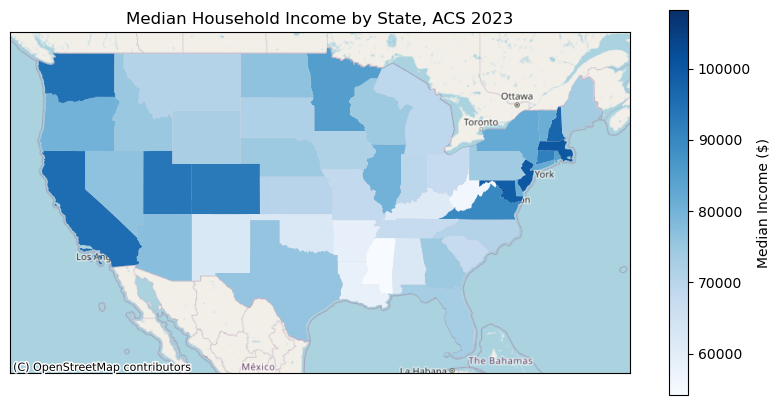

In [96]:
# pre-create an axis object
fig, ax = plt.subplots(figsize=(10,10))

# project to EPSG: 3857 to match the basemap
# use the markersize keyword to make the points smaller
incomedf.to_crs('EPSG:3857').plot(
            column='median_hh_income',
            ax=ax,
            markersize=20,  # Consistent size
            cmap='Blues',
            legend=True,
            legend_kwds={'label': "Median Income ($)",
            'shrink': 0.5,  # make the color bar shorter
            'aspect': 20} # controls width — higher = skinnier                         
                         )

# add a basemap
ctx.add_basemap(ax=ax, zoom=4, source=ctx.providers.OpenStreetMap.Mapnik)

# drop the tick labels
ax.set_xticks([])
ax.set_yticks([])

# add a title
ax.set_title('Median Household Income by State, ACS 2023')

# Note: I asked ChatGPT how to make the legend the same length as the map and it gave me the 'shrink' and 'aspect' code to add in.
# Colors from https://matplotlib.org/stable/users/explain/colors/colormaps.html

Your final product should look something like this, although if you are inclined, you could do a better job in arranging the color bar, adjusting the transparency and other settings, etc.
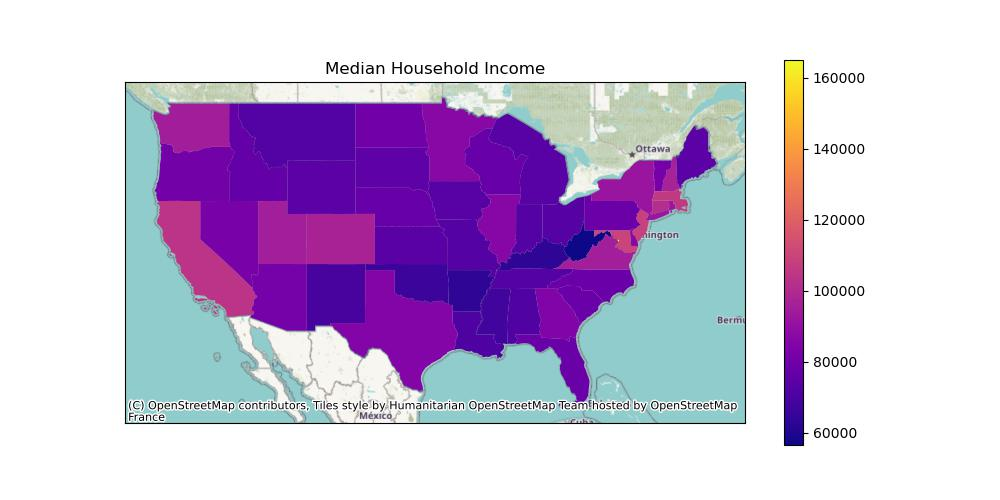

# Challenge Problem
Remember, you need to do at least two of these challenge problems during the quarter.

Look at the US EPA [AirNow API](https://docs.airnowapi.org). You'll need to register for your own API key - click on Log In and follow the steps to request an account. You'll get your key within a minute.

Once you a logged in, look at the Web Services, and then Observations by Monitoring Site. If you click on the Query Tool, you can build up a query in the point-and-click interface. This will help you understand the API syntax.

Back in Python, use the `requests` library to get all the data for PM 2.5 for each day in 2023 for a city or county of your choice (you might have to play around with the bounding box). Note that Los Angeles County will probably be too big, so choose another county or a part of LA. 

Return this data as a pandas dataframe.

Put this in a function that takes at least one argument. For example, you could write a function where you pass the year, or the pollutant type. Your function should return a dataframe with the results of your API query.

Then, map or plot the data in whatever way you choose (e.g. boxplots or line charts of pollution levels). 

If you want to map it, [here's some advice on how to convert a pandas dataframe into a geodataframe](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html), using the lat and lon columns returned by the API.                                                                           

